# 1. Import Library 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    accuracy_score,
    classification_report
)

# 2. Membaca Dataset

In [3]:
df = pd.read_csv("../data/calonpembelimobil.csv")
df.head()



,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


# 3. Eksplorasi Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


# 4. Data pre-processing

4.1 cek missing value

In [5]:
df.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

4.2 memeriksa nilai unik tiap kolom

In [6]:
print("Nilai unik kolom 'Status':", df['Status'].unique())
print("Nilai unik kolom 'Kelamin':", df['Kelamin'].unique())
print("Nilai unik kolom 'Memiliki_Mobil':", df['Memiliki_Mobil'].unique())
print("Nilai unik kolom 'Beli_Mobil':", df['Beli_Mobil'].unique())

Nilai unik kolom 'Status': [1 2 3 0]
Nilai unik kolom 'Kelamin': [0 1]
Nilai unik kolom 'Memiliki_Mobil': [0 1 2 4 3]
Nilai unik kolom 'Beli_Mobil': [1 0]


4.3 Mapping Kolom Kategori ke Bentuk numerik

In [7]:
# 1. maping kolom Beli_Mobil menjadi biner
map_beli = {'Beli': 1, 'Ya': 1, 'Tidak': 0, 'Tidak Beli': 0}
df['Beli_Mobil_bin'] = df['Beli_Mobil'].map(map_beli).astype('Int64')

# 2. maping kolom Kelamin menjadi biner
# 'Laki-laki' : 1, 'Perempuan' : 0
df['Kelamin_bin'] = (df['Kelamin'] == 'Laki-laki').astype(int)

print("Distribusi Beli_Mobil_bin:\n", df['Beli_Mobil_bin'].value_counts())
print("\nDistribusi Kelamin_bin:\n", df['Kelamin_bin'].value_counts())


Distribusi Beli_Mobil_bin:
 Series([], Name: count, dtype: Int64)

Distribusi Kelamin_bin:
 Kelamin_bin
0    1000
Name: count, dtype: int64


4.4 Analisis Korelasi antar variabel

In [8]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Beli_Mobil_bin,Kelamin_bin
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614,NaN,NaN
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127,NaN,NaN
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584,NaN,NaN
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301,NaN,NaN
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005,NaN,NaN
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930,NaN,NaN
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000,NaN,NaN
Beli_Mobil_bin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kelamin_bin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


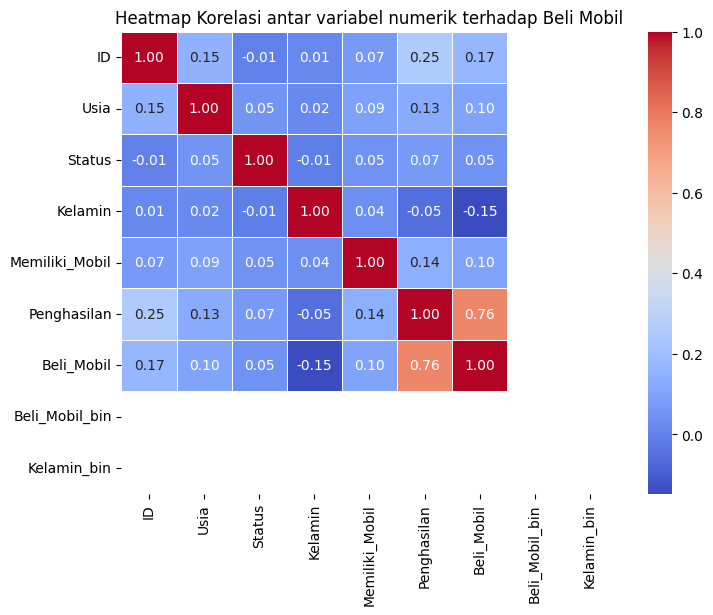

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f" , linewidths=0.5) 
plt.title("Heatmap Korelasi antar variabel numerik terhadap Beli Mobil")
plt.show()

# 5. Pembagian Dataset (Training dan Testing)

5.1 Menentukan Fitur target

In [10]:
df['Beli_Mobil_bin'] = df['Beli_Mobil']

# fitur numerik dan biner
feature_num = ['Status', 'Penghasilan']
feature_bin = ['Memiliki_Mobil']

df_model = df[feature_num + feature_bin + ['Beli_Mobil_bin']].dropna()

X = df_model[feature_num + feature_bin]
y = df_model['Beli_Mobil_bin']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 3)
y shape: (1000,)


5.2 Membagi Dataset menjadi training dan testing 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("data latih:", X_train.shape, y_train.shape)
print("data uji:", X_test.shape, y_test.shape)

data latih: (800, 3) (800,)
data uji: (200, 3) (200,)


# 6. Pembuatan Model Logistic Regression

In [33]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


# 7. Prediksi dan Evaluasi Model

In [13]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")

Akurasi: 0.9450
Precision: 0.9754
Recall: 0.9370
F1-score: 0.9558
ROC AUC: 0.9781


# 8. Visualisasi Hasil Evaluasi

8.1 Confusion Matrix

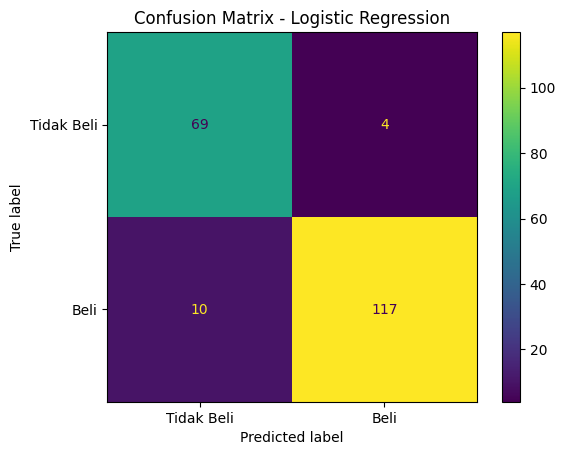

In [81]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Tidak Beli', 'Beli']).plot(values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

8.2 ROC Curve

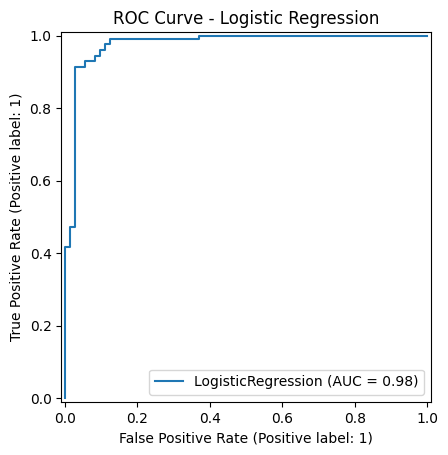

In [38]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

# 9. Classification Report

In [82]:
print(classification_report(y_test, y_pred, target_names=['Tidak Beli', 'Beli']))

              precision    recall  f1-score   support

  Tidak Beli       0.87      0.95      0.91        73
        Beli       0.97      0.92      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



# 10. Cross Validation

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X_scaled, y, cv=5)
print("Skor tiap fold:", scores)
print("Rata-rata skor:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.81  0.92  0.98  0.995 0.985]
Rata-rata skor: 0.9380000000000001
Standar deviasi: 0.06918092222571189


# 11. Interpretasi Model logistic Regression

In [ ]:
import pandas as pd
import numpy as np

model = LogisticRegression()
model.fit(X_train, y_train)

feat_nama = model.coef_[0]          
odds = np.exp(feat_nama)

coef_df = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': feat_nama,
    'odds_ratio': odds,
}).sort_values('odds_ratio', ascending=False)
coef_df

,Fitur,Koefisien,odds_ratio
1,Penghasilan,0.057318,1.058992
2,Memiliki_Mobil,0.040213,1.041032
0,Status,-0.211591,0.809296


# 12. Prediksi Data Baru

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Contoh dataset
data = pd.DataFrame({
    'Usia': [25, 40, 35, 50, 23, 45],
    'Status': [1, 2, 1, 2, 1, 2],
    'Kelamin': [1, 0, 1, 0, 1, 0],
    'Memiliki_Mobil': [0, 1, 0, 1, 0, 1],
    'Penghasilan': [200, 400, 300, 500, 180, 450],
    'Beli_Mobil': [0, 1, 0, 1, 0, 1]
})

# Fitur dan target
X = data.drop('Beli_Mobil', axis=1)
y = data['Beli_Mobil']

# Split data & latih model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# data baru untuk prediksi
data_baru = pd.DataFrame({
    'Usia': [30, 45],
    'Status': [1, 2],
    'Kelamin': [1, 0],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [250, 350]
})

# prediksi
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

# menggabungkan hasil
hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred_Beli_Mobil'] = pred
display(hasil)

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prob_Beli_Mobil,Pred_Beli_Mobil
0,30,1,1,0,250,0.05,0
1,45,2,0,1,350,0.83,1
